The simulations of black hole separations larger than 0.1 AU may take long (order of minutes with an Apple M1 chip). Thus, this notebook shows how to plot a data that is already generated. Instructions on how to create the data using a simulation and plot it just like this notebook is available in the notebook `Nature BBH Penning Code Simulation Demonstration`.

In [2]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Warning 243MB upload if run the next cell. Skip to the next block if desired smaller dataset.

In [2]:
# import the data and convert x, y, and z positions to numpy arrays
# the full sample dataset is 243 MB. 
# This is needed for demonstrating possibility of intermediate plotting
full_position_time_data = pd.read_csv('nature_demo_simulation_data.csv', index_col=0)
xt_long = np.array(full_position_time_data['x'])
yt_long = np.array(full_position_time_data['y'])
zt_long = np.array(full_position_time_data['z'])

## Smaller Dataset For Demonstration

In [3]:
# show the format of the data
small_position_time_data = pd.read_csv('nature_small_data_set.csv', index_col=0)
xt = np.array(small_position_time_data['x'])
yt = np.array(small_position_time_data['y'])
zt = np.array(small_position_time_data['z'])

## This data is when cyclotron frequency is $\approx$385 times larger than the black hole orbital frequency.
- Simulation that created this data has inter-black hole separation 2b = $6 \cdot 10^9$ meters = 0.04AU.
- We give a z displacement of 20 meters, this will decouple radial motion.
- We give an initial velocity of 10000m/s outward.
- We make the particle start at x = 0.01b = $3 \cdot 10^7$ meters = $2 \cdot 10^{-4}$ AU, y=0.
- Evolve the black holes for 75 full rotations.
- There are 100 samples (time steps) per cyclotron period.
- There are approximately 38540 time steps per black hole rotation.
- We use equal mass black holes.
- Each black hole has a mass of 50 $\rm{M}_{\odot}$.
- The particle we are simulating is a proton.
- Exact Orbital Period In Days: 0.29253318645648146
- The time until the black holes merge is approximately 3.28e+06 years.
- Axial Period In Days: 0.10342609993274338
- Cylotron period in seconds = 65.58074664368694
- Ratio of gravitational to cylotron period = 385.40072511164465

## The cell below declares the 3D and 2D plotting functions.

In [4]:
def plot_position_updated_3d_simple(x_t, y_t, z_t,
                                    rot, samp_rot,
                                    plot_sample=1, alpha=0.5,
                                    savefig=True, final=True):
    """
    Plot a 3D trajectory segment from a long simulation.

    Description
    ----------
    Plots samples from index 0 to `rot * samp_rot` stepping by `plot_sample`.
    Useful when you simulated many rotations but want to visualize only a subset.

    Parameters
    ----------
    x_t, y_t, z_t : array_like
        Trajectory components.
    rot : int
        Number of rotations (of the *binary*) to include in the plot window.
    samp_rot : int
        Number of time samples per *binary* rotation (not per magnetic rotation).
    plot_sample : int, optional
        Plot every `plot_sample`-th point (downsampling for speed).
    alpha : float, optional
        Line transparency for the trajectory.
    savefig : bool, optional
        If True, saves the figure as 'test_fig.pdf'.
    final : bool, optional
        If True, marks the final point in green.

    Returns
    -------
    None
    """
    plt.figure(figsize=(6, 6))
    ax = plt.axes(projection='3d')

    # Slice length: rot * samp_rot; step by plot_sample to thin points if needed
    ax.plot3D(x_t[0:rot * samp_rot:plot_sample],
              y_t[0:rot * samp_rot:plot_sample],
              z_t[0:rot * samp_rot:plot_sample],
              alpha=alpha)

    # Markers for initial/final
    ax.scatter3D(x_t[0], y_t[0], z_t[0], color='red', label='initial')
    if final:
        ax.scatter3D(x_t[-1], y_t[-1], z_t[-1], color='green', label='final')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend()

    if savefig:
        plt.savefig('test_fig.pdf', bbox_inches='tight')


def plot_position_updated_2d_simple(x_t, y_t, samp_rot, savefig=False, final=True):
    """
    2D (x–y) projection of the trajectory with sentinel markers.

    Parameters
    ----------
    x_t, y_t : array_like
        Trajectory components (same length).
    samp_rot : int
        Number of samples per rotation (used to mark quarter/half points).
    savefig : bool, optional
        If True, saves the figure as 'test_fig.pdf'.
    final : bool, optional
        If True, marks the final point in green.

    Returns
    -------
    None
    """
    plt.figure(figsize=(6, 6))
    plt.plot(x_t[0:-1], y_t[0:-1:1], alpha=0.5)

    plt.scatter(x_t[0], y_t[0], color='red', label='initial')
    # NOTE: `if True:`—this always executes; if you intended conditional plotting,
    # tie this to `final` or another flag.
    if True:
        plt.scatter(x_t[-1], y_t[-1], color='green', label='final')
        plt.scatter(x_t[int(samp_rot / 2)], y_t[int(samp_rot / 2)],
                    color='magenta', label='first_half')
        plt.scatter(x_t[int(samp_rot / 4)], y_t[int(samp_rot / 4)],
                    color='blue', label='quarter')

    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.legend()


def alt_plot_position_updated_2d_simple(x_t, y_t, samp_rot, savefig=False, final=True):
    """
    Alternate 2D (x–y) plot using an explicit Axes object.

    Parameters
    ----------
    x_t, y_t : array_like
        Trajectory components (same length).
    samp_rot : int
        Number of samples per rotation (used to mark quarter/half points).
    savefig : bool, optional
        If True, saves the figure as 'test_fig.pdf'.
    final : bool, optional
        If True, marks the final point in green.

    Returns
    -------
    None
    """
    plt.figure(figsize=(6, 6))
    ax = plt.axes()
    ax.plot(x_t[0:-1], y_t[0:-1:1], alpha=0.5)

    ax.scatter(x_t[0], y_t[0], color='red', label='initial')
    ax.scatter(x_t[-1], y_t[-1], color='green', label='final')
    ax.scatter(x_t[int(samp_rot / 2)], y_t[int(samp_rot / 2)],
               color='magenta', label='first_half')
    ax.scatter(x_t[int(samp_rot / 4)], y_t[int(samp_rot / 4)],
               color='blue', label='quarter')

    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.legend()

    if savefig:
        plt.savefig('test_fig.pdf', bbox_inches='tight')


### 3D plot: Plotting up to first 15 rotations
Explicily plotting until a certain black hole rotation. This way is recommended for users familiar with slicing and indexing in python. It lets the user see where the final part is. Additionally, the plotting can be done between any 2 rotations such as from 45-60.
- Each black hole rotation has approximately 38540 samples. 
- We want to plot up to first 15 rotations.
- We use the slicing as xtestpenning[0:int(38540\*15)]. `int` typecasting is used because indexes must be integers.
- When such slicing is used `rot` and `plot_sample` must be 1 and `samp_rot` must be `len(data) -1`. 

More details are available on the actual decleration of `plot_position_updated_3d_simple`.

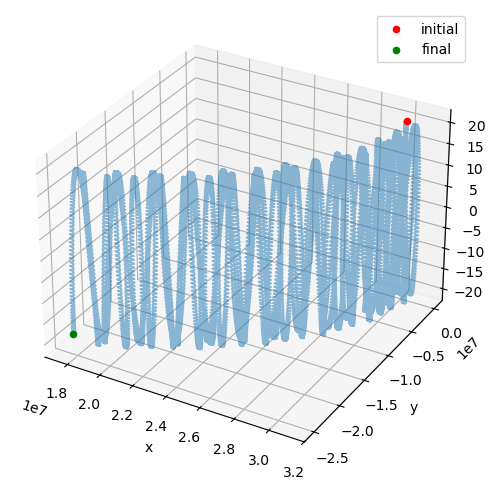

In [5]:
plot_position_updated_3d_simple(xt[0:int(38540*15)],
                                yt[0:int(38540*15)],
                                zt[0:int(38540*15)],
                                rot=1, samp_rot=len(xt[0:int(38540*15)])-1,
                                plot_sample=1, alpha=0.5, final=True, savefig=False)

### 3D Plot: Plotting from rotation 45-60 with the slicing method. Requires full dataset.

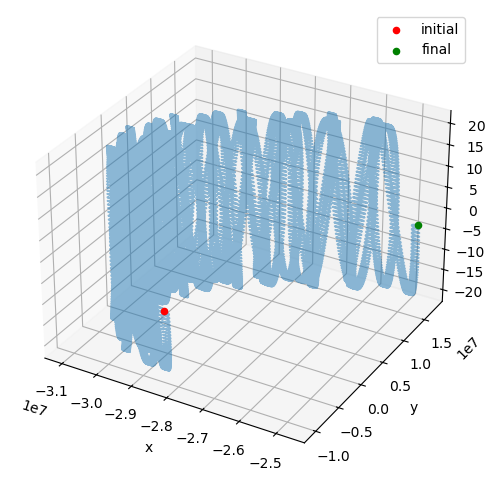

In [6]:
plot_position_updated_3d_simple(xt_long[int(38540*45):int(38540*60)],
                                yt_long[int(38540*45):int(38540*60)],
                                zt_long[int(38540*45):int(38540*60)],
                                rot=1, samp_rot=len(xt_long[int(38540*45):int(38540*60)])-1,
                                plot_sample=1, alpha=0.5, final=True, savefig=False)

### 3D plotting entire trajectory (for the longer dataset, 75 rotations):
A setup to plot the entire trajectory. No need for slicing. However, the cyclotron motion may not be visually resolved and users may decide to plot partial trajectories.

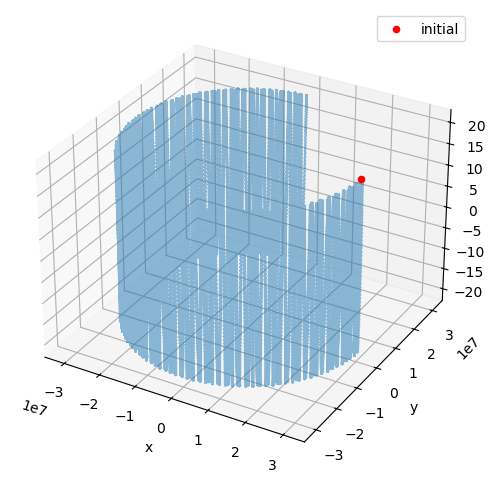

In [7]:
plot_position_updated_3d_simple(xt, yt, zt, rot=1,
                                samp_rot=len(xt)-1,
                                plot_sample=1, alpha=0.5, final=False)

### 3D Plot: Plot up to 15 rotations from the beginning without slicing.
This may be more user friendly for user that are not familiar with python indexing. Note that final needs to be set to false when plotting partial trajectories this way as it would plot the final point of the whole dataset.

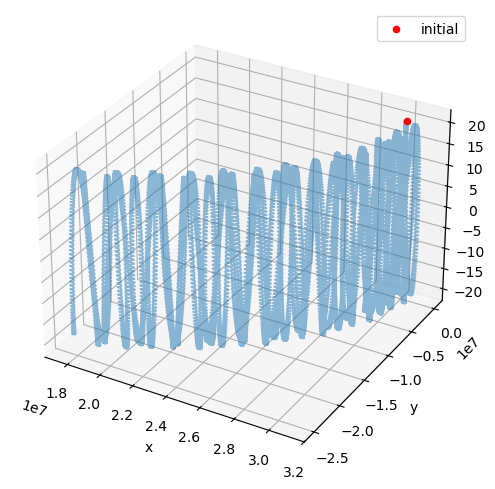

In [6]:
plot_position_updated_3d_simple(xt, yt, zt,
                                rot=15, samp_rot=38540, plot_sample=1, alpha=0.5, final=False)

## 2D Plot
The user may want to see the 2D cross section of the motion. `plot_position_updated_2d_simple` serves that purpose. Additionally, this plotting function indicates the position of the particle at initial position, quarter of the first rotation, half of the first rotation, and final position.

## Plotting 2D up to first 15 rotations using slicing
This function is more primitive compared to 3D plotting. There is only option to plot with slices and not explicitly stating rotation. The `samp_rot` parameter is used to define the quarter and half rotations.

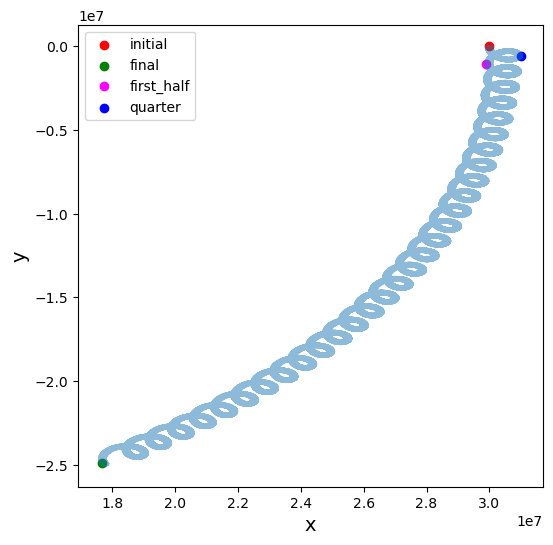

In [7]:
plot_position_updated_2d_simple(xt[0:int(38540*15)], yt[0:int(38540*15)], samp_rot=38540)

## Zooming into see cyclotron rotations.
The bold trajectory indicates the cyclotron rotations. For zooming indexing, use the number of samples per cyclotron rotation. For example, for 100 samples per rotation, indexing the data up to 10*\100 would show first 10 cyclotron orbits. 

### Here is a zoomed version of the first 500 cyclotron iterations.
Because we have an initial velocity of 10000 it results in cyclotron radius of 100000 meters which is visually comparable with system size resulting in boldness.

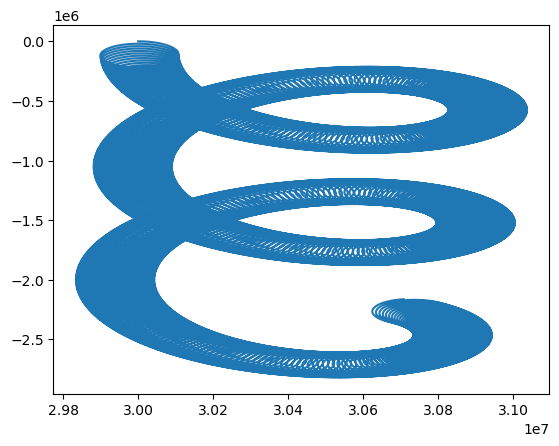

In [9]:
plt.plot(xt[0:int(500*100)], yt[0:int(500*100)])

### Zooming in even more, we can see the first 10 cyclotron motion

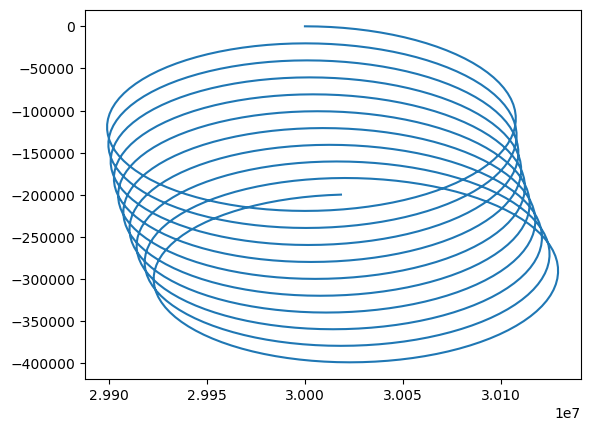

In [10]:
plt.plot(xt[0:int(10*100)], yt[0:int(10*100)])